### Importing Libraries

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
from collections import defaultdict
import seaborn as sns
import numpy as np
import hashlib

### Visualize Image Samples

In [8]:
# Load animal names from the text file
with open('../data/animals.txt', 'r') as f:
    animal_names = [line.strip() for line in f.readlines()]

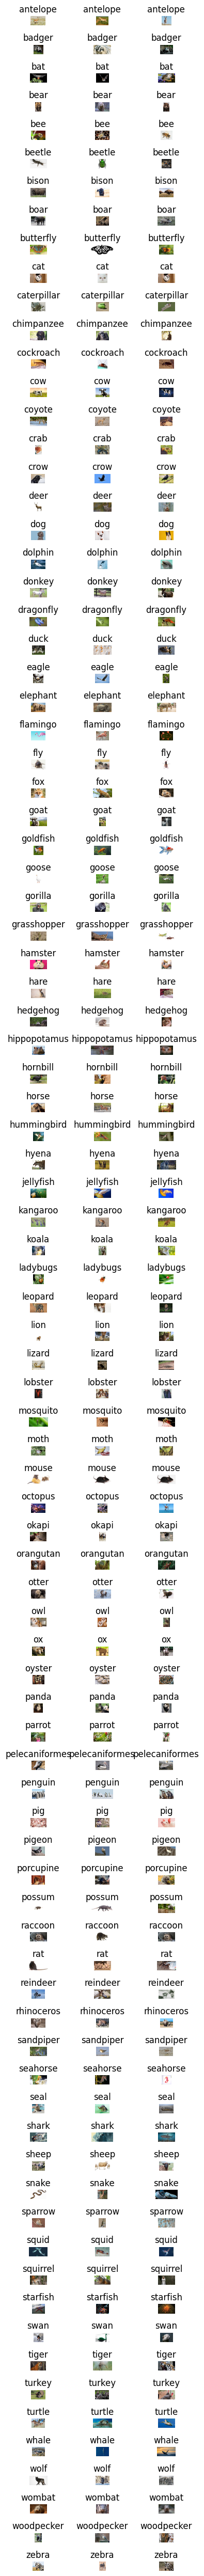

In [24]:
num_samples = 3  # Number of samples to display per class

plt.figure(figsize=(4, 50))

for i, animal in enumerate(animal_names):
    image_files = os.listdir(f'../data/images/{animal}')[:num_samples]

    for j, image_file in enumerate(image_files):
        img = Image.open(f'../data/images/{animal}/{image_file}')

        plt.subplot(len(animal_names), num_samples, i * num_samples + j + 1)
        plt.imshow(img)
        plt.title(f'{animal}')
        plt.axis('off')
        
plt.tight_layout()
plt.show()

### Check Class Imbalance

*Observation: The dataset is perfectly balanced, with each of the 90 animal classes containing exactly 60 images.*

*Total Images: 90 classes × 60  images/class = 5400 images.*

In [17]:
class_counts = {}

for animal in animal_names:
    class_counts[animal] = len(os.listdir(f'../data/images/{animal}'))

for animal, count in class_counts.items():
    print(f'{animal}: {count} images')

antelope: 60 images
badger: 60 images
bat: 60 images
bear: 60 images
bee: 60 images
beetle: 60 images
bison: 60 images
boar: 60 images
butterfly: 60 images
cat: 60 images
caterpillar: 60 images
chimpanzee: 60 images
cockroach: 60 images
cow: 60 images
coyote: 60 images
crab: 60 images
crow: 60 images
deer: 60 images
dog: 60 images
dolphin: 60 images
donkey: 60 images
dragonfly: 60 images
duck: 60 images
eagle: 60 images
elephant: 60 images
flamingo: 60 images
fly: 60 images
fox: 60 images
goat: 60 images
goldfish: 60 images
goose: 60 images
gorilla: 60 images
grasshopper: 60 images
hamster: 60 images
hare: 60 images
hedgehog: 60 images
hippopotamus: 60 images
hornbill: 60 images
horse: 60 images
hummingbird: 60 images
hyena: 60 images
jellyfish: 60 images
kangaroo: 60 images
koala: 60 images
ladybugs: 60 images
leopard: 60 images
lion: 60 images
lizard: 60 images
lobster: 60 images
mosquito: 60 images
moth: 60 images
mouse: 60 images
octopus: 60 images
okapi: 60 images
orangutan: 60 im

In [12]:
# Convert to DataFrame for visualization
df = pd.DataFrame(list(class_counts.items()), columns=['Animal', 'Count'])

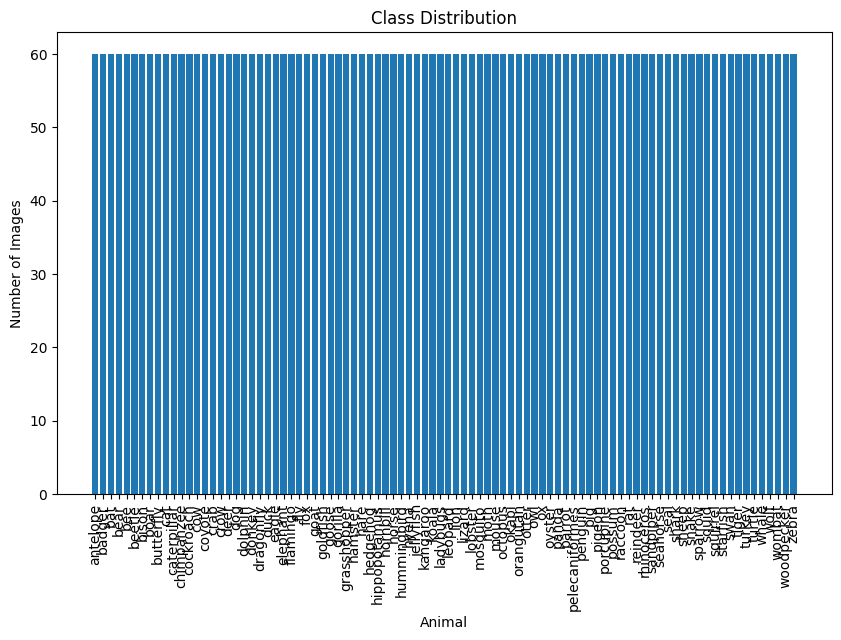

In [13]:
# Plot class distribution
plt.figure(figsize=(10, 6))
plt.bar(df['Animal'], df['Count'])
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Animal')
plt.ylabel('Number of Images')
plt.show()

### Analyze Image Sizes

*Observation: The dataset contains images with high variability in size, ranging from small (225×225) to very large (1760×1745). This variability can pose challenges for model training, as most deep learning models require input images to be of a fixed size.*

In [20]:
image_sizes = []

for animal in animal_names:
    for img_name in os.listdir(f'../data/images/{animal}'):
        with Image.open(f'../data/images/{animal}/{img_name}') as img:
            image_sizes.append(img.size)

pd.Series(image_sizes).value_counts()

(275, 183)      477
(300, 168)      344
(259, 194)      224
(225, 225)      172
(299, 168)      103
               ... 
(1055, 1500)      1
(1760, 1745)      1
(1600, 1116)      1
(600, 449)        1
(1500, 1483)      1
Name: count, Length: 1824, dtype: int64

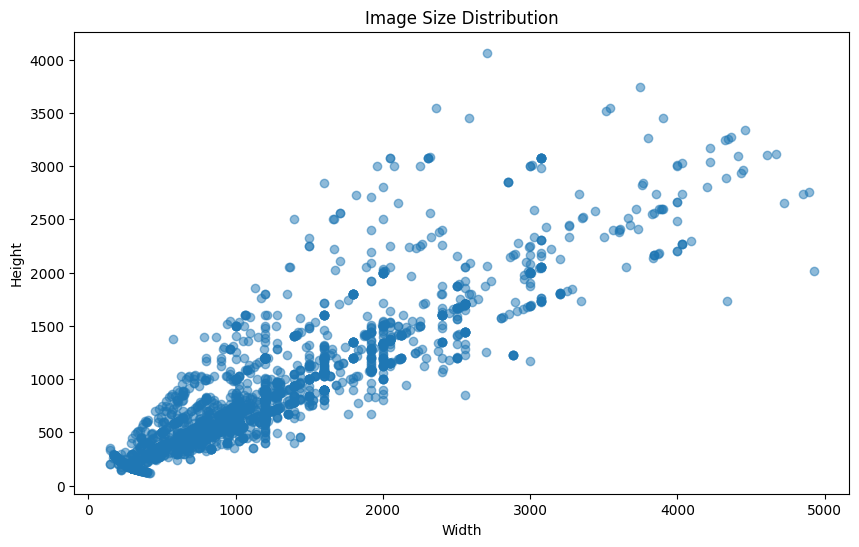

In [15]:
# Convert to DataFrame
df_sizes = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

# Plot distribution of image sizes
plt.figure(figsize=(10, 6))
plt.scatter(df_sizes['Width'], df_sizes['Height'], alpha=0.5)
plt.title('Image Size Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [19]:
# Print summary statistics
df_sizes.describe()

,Width,Height
count,5400.000000,5400.000000
mean,808.590370,566.839259
std,738.245633,545.467990
min,145.000000,120.000000
25%,275.000000,183.000000
50%,480.000000,347.500000
75%,1200.000000,739.750000
max,4928.000000,4064.000000


### Analyze Image Formats

*Observation: The dataset is consistent in terms of image format.*

In [27]:
# Collect image formats
image_formats = defaultdict(int)

for animal in animal_names:
    for img_name in os.listdir(f'../data/images/{animal}'):
        img_format = img_name.split('.')[-1].lower()
        image_formats[img_format] += 1

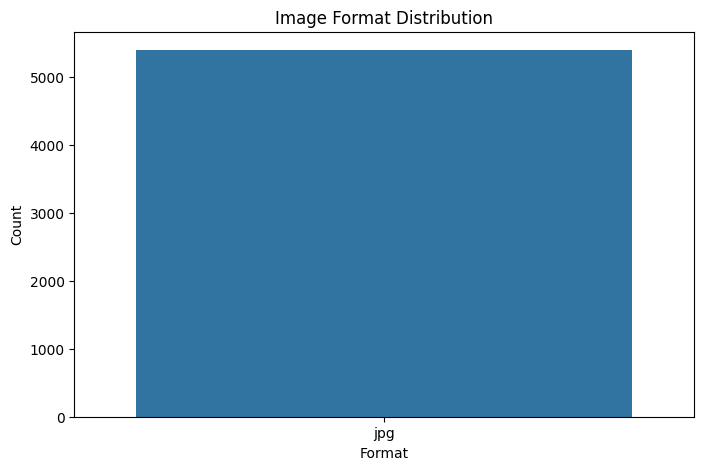

In [30]:
# Plot image format distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=list(image_formats.keys()), y=list(image_formats.values()))
plt.title('Image Format Distribution')
plt.xlabel('Format')
plt.ylabel('Count')
plt.show()

### Check for Corrupted Images

*Observation: No corrupted images were found in the dataset. This indicates that the dataset is clean and well-maintained, with all images being readable and processable by standard image processing libraries.*

In [33]:
# Check for corrupted images
corrupted_images = []

for animal in animal_names:
    for img_name in os.listdir(f'../data/images/{animal}'):
        try:
            img = Image.open(f'../data/images/{animal}/{img_name}')
            img.verify()  # Verify that the file is an image

        except (UnidentifiedImageError, IOError):
            corrupted_images.append(f'../data/images/{animal}/{img_name}')

In [34]:
# Print corrupted images
if corrupted_images:
    print(f'Found {len(corrupted_images)} corrupted images:')
    for img_path in corrupted_images:
        print(img_path)
else:
    print('No corrupted images found.')

No corrupted images found.


### Visualize Image Color Distribution

In [36]:
# Collect average pixel values (R, G, B) for each image
avg_colors = []

for animal in animal_names:
    for img_name in os.listdir(f'../data/images/{animal}'):
        img = Image.open(f'../data/images/{animal}/{img_name}')
        img_array = np.array(img)
        avg_colors.append(img_array.mean(axis=(0, 1)))  # Average across width and height

In [37]:
df_colors = pd.DataFrame(avg_colors, columns=['Red', 'Green', 'Blue'])

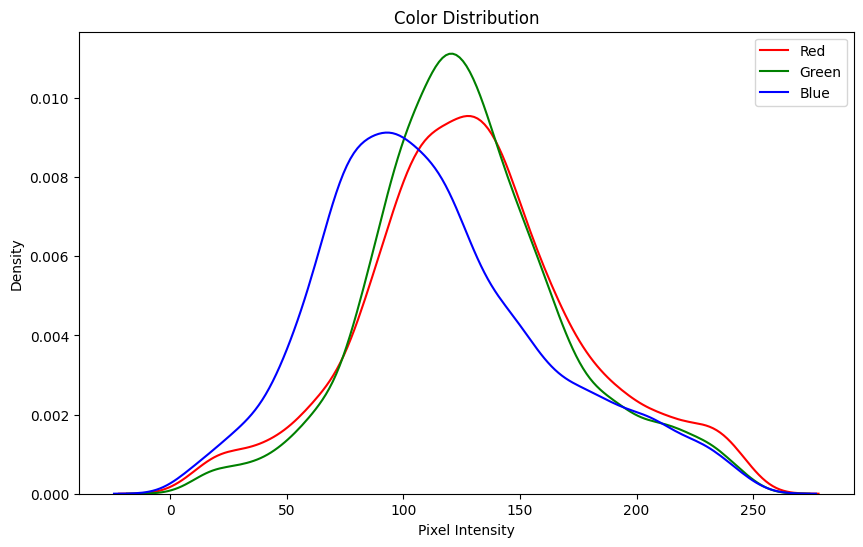

In [38]:
# Plot color distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df_colors['Red'], label='Red', color='red')
sns.kdeplot(df_colors['Green'], label='Green', color='green')
sns.kdeplot(df_colors['Blue'], label='Blue', color='blue')
plt.title('Color Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.legend()
plt.show()

### Check for Duplicate Images

In [40]:
# Function to compute hash of an image
def compute_hash(image_path):
    with open(image_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

In [41]:
# Collect image hashes
image_hashes = defaultdict(list)

for animal in animal_names:
    for img_name in os.listdir(f'../data/images/{animal}'):
        img_path = f'../data/images/{animal}/{img_name}'
        img_hash = compute_hash(img_path)
        image_hashes[img_hash].append(img_path)

In [42]:
# Find duplicates
duplicates = {hash: paths for hash, paths in image_hashes.items() if len(paths) > 1}

if duplicates:
    print(f'Found {len(duplicates)} duplicate images:')
    
    for hash, paths in duplicates.items():
        print(f'Hash: {hash}, Paths: {paths}')
else:
    print('No duplicate images found.')

Found 1 duplicate images:
Hash: ccea26110e58e6789c569a849a1c5f64, Paths: ['../data/images/mouse/35ea12b897.jpg', '../data/images/rat/35ea12b897.jpg']


### Summary Statistics

In [44]:
print(f'Total number of classes: {len(animal_names)}')
print(f'Total number of images: {sum(class_counts.values())}')
print(f'Average number of images per class: {sum(class_counts.values()) / len(animal_names)}')
print(f'Class with the most images: {max(class_counts, key=class_counts.get)} ({max(class_counts.values())} images)')
print(f'Class with the fewest images: {min(class_counts, key=class_counts.get)} ({min(class_counts.values())} images)')

Total number of classes: 90
Total number of images: 5400
Average number of images per class: 60.0
Class with the most images: antelope (60 images)
Class with the fewest images: antelope (60 images)
